# 04/27/23

This notebook is intended to try to enumerate a canonical SMILES into a random smiles (of the same molecule identity). 

In [10]:
import rdkit, numpy as np, pickle
test_molecule = "COC(=O)CCC(=O)c1ccc(OC2CCCCO2)cc1O"

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from pysmilesutils.augment import SMILESAugmenter, MolAugmenter

In [42]:
def assert_same(inp):
  mol = Chem.MolFromSmiles(inp)
  mol_str = Chem.MolToSmiles(mol)
  return inp == mol_str

def display_smiles(smiles):
  mol = Chem.MolFromSmiles(smiles)
  display(mol)

In [12]:
with open("tempdata/chemformer/uspto_50.pickle", "rb") as f:
  obj = pickle.load(f)

In [54]:
for i in range(5):
  usp = Chem.MolToSmiles(obj.iloc[i,0])
  print(usp, type(usp))

CS(=O)(=O)OC[C@H]1CCC(=O)O1.Fc1ccc(Nc2ncnc3cc(OCCN4CCNCC4)c(OC4CCCC4)cc23)cc1Cl <class 'str'>
COC(=O)c1cc(CCCc2cc3c(=O)[nH]c(N)nc3[nH]2)cs1 <class 'str'>
CC1(C)OB(B2OC(C)(C)C(C)(C)O2)OC1(C)C.FC(F)(F)c1ccnc(Nc2cccc(Br)c2)n1 <class 'str'>
CC(C)(C)OC(=O)NCC(=O)CCC(=O)OCCCC(=O)OCc1ccccc1 <class 'str'>
Fc1cc2c(Cl)ncnc2cn1.NC1CCCCCC1 <class 'str'>


In [48]:
aug = SMILESAugmenter(restricted=True)

In [55]:
aug(["COC(=O)c1cc(CCCc2cc3c(=O)[nH]c(N)nc3[nH]2)cs1", "Fc1cc2c(Cl)ncnc2cn1.NC1CCCCCC1"])

['O=c1c2c(nc(N)[nH]1)[nH]c(CCCc1cc(C(=O)OC)sc1)c2',
 'NC1CCCCCC1.n1c(Cl)c2cc(F)ncc2nc1']

Source molecule:


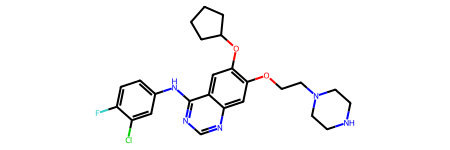

Augmented: 
[0] C1C(Oc2cc3c(Nc4cc(Cl)c(F)cc4)ncnc3cc2OCCN2CCNCC2)CCC1


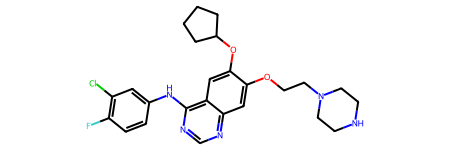

[1] C1CCC(Oc2cc3c(Nc4cc(Cl)c(F)cc4)ncnc3cc2OCCN2CCNCC2)C1


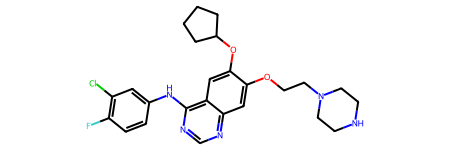

[2] N(c1cc(Cl)c(F)cc1)c1ncnc2c1cc(OC1CCCC1)c(OCCN1CCNCC1)c2


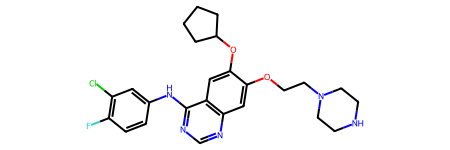

[3] C1NCCN(CCOc2c(OC3CCCC3)cc3c(Nc4ccc(F)c(Cl)c4)ncnc3c2)C1


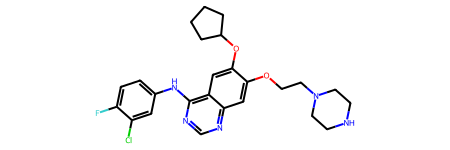

[4] c1nc(Nc2cc(Cl)c(F)cc2)c2c(n1)cc(OCCN1CCNCC1)c(OC1CCCC1)c2


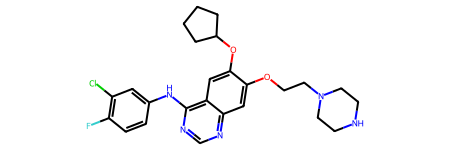

In [52]:
src = "Fc1ccc(Nc2ncnc3cc(OCCN4CCNCC4)c(OC4CCCC4)cc23)cc1Cl"
print("Source molecule:")
display_smiles(src)
print("Augmented: ")
for i in range(5):
  aug_src = aug(src)[0]
  print(f"[{i}] {aug_src}")
  display_smiles(aug_src)